In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time 
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import tree

# Section C

In [2]:
df = pd.read_csv('data.csv').iloc[:,1:] #the shape of the data
df.shape

(12563, 8)

In [3]:
df.head().T # the data head

,0,1,2,3,4
area_type,B,B,B,B,B
availability,1,1,0,1,1
bedrooms,3.0,2.0,2.0,3.0,2.0
total_sqft,1655.0,1102.0,1112.0,1450.0,1010.0
bath,3.0,2.0,2.0,3.0,2.0
balcony,1.0,1.0,1.0,3.0,1.0
ranked,134,134,242,335,261
price in rupees,10800000.0,4800000.0,8800000.0,5100000.0,4100000.0


In [4]:
df.area_type = df.area_type.map({'B': 0,'P': 1}) # restart and run All

In [5]:
df.info()# info about our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12563 entries, 0 to 12562
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area_type        12563 non-null  int64  
 1   availability     12563 non-null  int64  
 2   bedrooms         12563 non-null  float64
 3   total_sqft       12563 non-null  float64
 4   bath             12563 non-null  float64
 5   balcony          12563 non-null  float64
 6   ranked           12563 non-null  int64  
 7   price in rupees  12563 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 785.3 KB


In [6]:
df # printing all the data

,area_type,availability,bedrooms,total_sqft,bath,balcony,ranked,price in rupees
0,0,1,3.0,1655.0,3.0,1.0,134,10800000.0
1,0,1,2.0,1102.0,2.0,1.0,134,4800000.0
2,0,0,2.0,1112.0,2.0,1.0,242,8800000.0
3,0,1,3.0,1450.0,3.0,3.0,335,5100000.0
4,0,1,2.0,1010.0,2.0,1.0,261,4100000.0
...,...,...,...,...,...,...,...,...
12558,0,1,3.0,1720.0,3.0,3.0,134,9897000.0
12559,0,0,3.0,1275.0,3.0,2.0,276,4400000.0
12560,1,1,2.0,1550.0,2.0,1.0,252,7100000.0
12561,0,1,3.0,1535.0,3.0,1.0,307,7200000.0


In [7]:
df_train = df.iloc[:8040,:]#reshape the data
df_test = df.iloc[8040:,:]

In [8]:
df_train.shape, df_test.shape

((8040, 8), (4523, 8))

In [9]:
X_train_classification = df_train.iloc[:,1:]#devide the data to train test validation
X_train_regression = df_train.iloc[:,:7]
X_test_classification = df_test.iloc[:,1:]
X_test_regression = df_test.iloc[:,:7]
y_train_classification = df_train.iloc[:,0]
y_test_classification = df_test.iloc[:,0]
y_train_regression = df_train.iloc[:,7]
y_test_regression = df_test.iloc[:,7]

In [10]:
# tree_classifier Fit, Predict with hyperparametrs
start = time.time()
tree_classifier = DecisionTreeClassifier(criterion ='gini', random_state=11, max_depth = 5).fit(X_train_classification,y_train_classification)
predictions_classi_t = tree_classifier.predict(X_test_classification)
end = time.time()
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test_classification, predictions_classi_t))
print(classification_report(y_test_classification, predictions_classi_t))
print("Timer= ", end - start)

[[3752  120]
 [ 308  343]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      3872
           1       0.74      0.53      0.62       651

    accuracy                           0.91      4523
   macro avg       0.83      0.75      0.78      4523
weighted avg       0.90      0.91      0.90      4523

Timer=  0.025139808654785156


In [20]:
# Ada_classifier Fit, Predict with hyperparametrs
start_a = time.time()
ada_classifier = AdaBoostClassifier(n_estimators = 5).fit(X_train_classification,y_train_classification)# fit
predictions_ada = ada_classifier.predict(X_test_classification)# predict
end_a = time.time()
print("Timer= ", end_a - start_a)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test_classification, predictions_ada))
print(classification_report(y_test_classification, predictions_ada))


Timer=  0.05284738540649414
[[3561  311]
 [ 292  359]]
              precision    recall  f1-score   support

          -1       0.92      0.92      0.92      3872
           1       0.54      0.55      0.54       651

    accuracy                           0.87      4523
   macro avg       0.73      0.74      0.73      4523
weighted avg       0.87      0.87      0.87      4523



In [12]:
def show_regresion_error(predictions, true_values):# method to draw a graph
    df_predict = pd.DataFrame(predictions, true_values)
    df_predict = df_predict.reset_index(level=0, inplace=False)
    df_predict.columns = ['true_value', 'predictions']
    sns.scatterplot(data=df_predict, y='predictions', x='true_value')
    sns.lineplot(data=df_predict, x='true_value', y='true_value', color='g')

MSE: 8210734.06935035
Time: 0.015724658966064453


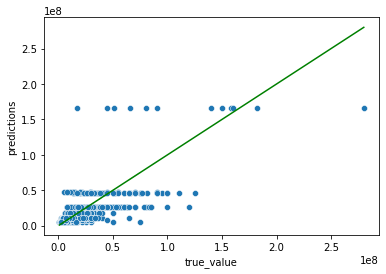

In [13]:
# tree_Regressor Fit, Predict with hyperparametrs
s_tree_reg_time_start = time.time()
tree_regressor = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 2).fit(X_train_regression, y_train_regression)
predictions_regresso = tree_regressor.predict(X_test_regression)
s_tree_reg_time_end= time.time()
print('MSE:',(np.square(predictions_regresso - y_test_regression)).mean()**0.5)
show_regresion_error(predictions_regresso, y_test_regression)

print('Time:', s_tree_reg_time_end - s_tree_reg_time_start)

MSE: 10298630.147626821


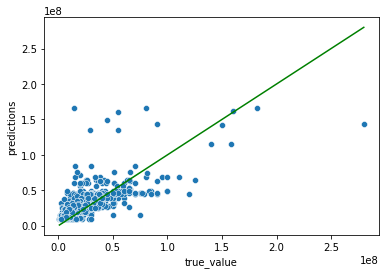

In [14]:
# Ada_Regressor Fit, Predict with hyperparametrs
ada_regressor = AdaBoostRegressor(n_estimators = 32).fit(X_train_regression, y_train_regression)
predictions = ada_regressor.predict(X_test_regression)
print('MSE:',(np.square(predictions - y_test_regression)).mean()**0.5)
show_regresion_error(predictions, y_test_regression)


# Section A + 

# Section B - (predictions) + 

# Comparision of Section C(run Time + accuracy of my tree,adaboost vs there tree,adaboost )

## Decsion tree classifier 

1) i will start from the root node 

2) for each node/depth i will find the best split based on gini + information gain from the split (previous node and children)

3) i will do greedy search to find the best feature and the best question for each decision node

4) stop if we are in leaf node(value != None) or we reached the max depth or there is less than a min samples in node

5) when we reach a leaf node we will find for which class the node belongs

In [15]:
class Node:
    def __init__(self, feature=None, question=None, left=None, right=None ,toClass=None):
        self.feature = feature # the node feature
        self.question = question # the node split question
        self.left = left # the node left child
        self.right = right # the node right child
        self.toClass = toClass # the node class
        
    def isLeaf(self): # only leaf contain values 
        if self.toClass == None:
            return False
        return True
    
class DecisionTreeClassifierMine():# my decision tree class
    
    
    def gini(self, y):# gini to check to imourity
        numberOfLabels = np.bincount(y)
        probOfLabels = numberOfLabels / len(y)
        sum = 0
        for gi in probOfLabels:
            sum += gi**2
        return 1 - sum
    
  
    
    def Score(self, y, xClo, split_value):# lets see  what better the father node or the children split
            left_split = np.argwhere(xClo <= split_value).flatten()# the split to left
            right_split = np.argwhere(xClo > split_value).flatten()# the split to right
            total_len = len(left_split) + len(right_split)
            gini_left = self.gini(y[left_split])# gini for the left
            gini_right = self.gini(y[right_split])# gini for the right
            total_gini_of_childrens = gini_left * (len(left_split) / total_len) + gini_right * (len(right_split) / total_len)
            gini_of_father = self.gini(y)# calc the father gini
            return gini_of_father - total_gini_of_childrens # the smaller the "father - children" result the better is the split
        

    
    def __init__(self, min_sapmles_split=2, max_depth=2):# C'tor
        self.min_sapmles_split = min_sapmles_split
        self.max_depth = max_depth
        self.number_of_feats = 7
        self.root = None
        
    def fit(self, X, y):# fit the model by calling the build tree function
        self.root = self.buildTree(X, y)
    
    
        
    def buildTree(self, X, y, depth = 0):# depth = 0 at the beginning
        number_of_samples = X.shape[0]
        number_of_features = X.shape[1]
        labels = np.unique(y)
        if(number_of_samples < self.min_sapmles_split or len(labels) == 1 or depth > self.max_depth):# lets check the leaf to which class it belongs too
                # predecting if the leaf node belongs to class 0 or class 1
                leafVal = None
                tempL = list(y)
                mapT = {0:0, 1:0}
                max0 = 0
                max1 = 0
                for ele in y:
                    if ele == 0:
                        mapT[0] = mapT[0] + 1
                    elif ele == 1:
                        mapT[1] = mapT[1] + 1
                max0 = mapT[0]
                max1=  mapT[1]
                key_list = list(mapT.keys())
                if max0 >= max1:
                    leafVal = key_list.index(0)
                
                else:
                    leafVal = key_list.index(1)
                return Node(toClass = leafVal)
                  
        best_feature, best_feature_split_value = self.find_best_feature(X,y)# find the best feeature with his best value
        left_f = np.argwhere(X[:, best_feature] <= best_feature_split_value).flatten()# split all the feature that less to the left
        right_f = np.argwhere(X[:, best_feature] > best_feature_split_value).flatten()# split all the feature that bigger to the right
        left = self.buildTree(X[left_f, :], y[left_f], depth + 1)# recursicve call 
        right = self.buildTree(X[right_f, :], y[right_f], depth + 1)
        return Node(best_feature, best_feature_split_value, left, right)# creating decision Node
                
    
    
    def find_best_feature(self, X, y):# based on Ilan's lecture 3
            best_feature_score = float("-inf")
            our_features = [0,1,2,3,4,5,6]
            features_np = np.array(self.shuffleFeats(our_features))
            best_feature = None
            best_feature_value = None
            for feat_col in features_np:
                feature_col = X[:, feat_col]
                if type(feature_col[0]) == float:# based on Amanda's and Ehud lectures
                    feature_col = np.sort(feature_col)
            # lets see all the values of the columns of the feature:
                feature_values = np.unique(feature_col)
                if(type(feature_values[0]) == float):
                    feature_values = np.sort(feature_values)
                for featureVal in feature_values:
                    gini_score_value = self.Score(y, feature_col, featureVal)
     # we get here the father node impurity minus the children so  the bigger score the better :
    #assume that children impurity is 0.3 and parent impurity is 0.7 so
    #gini_of_father - total_gini_of_childrens = 0.7 - 0.3 = 0.5
    #now assume that children impurity is 0.6 and and parent impurity is 0.7 so 
    #gini_of_father - total_gini_of_childrens = 0.7 - 0.6 = 0.1
    # so the better split is the children(0.5)
                    if gini_score_value > best_feature_score:# saving the best split and best feature of the greedy search
                        best_feature_score = gini_score_value
                        best_feature = feat_col
                        best_feature_value = featureVal
            return best_feature, best_feature_value
            
    
    
    
        
        
    def shuffleFeats(self,listOfIdx):#function to shuffle the features indexes
        random.shuffle(listOfIdx)
        l = []
        for item in listOfIdx:
            l.append(item)
        return l
    
    #Precdtion method to predict using the features of the data set(SECTION B)
    def predict(self, X):# predict method
        prediction = []
        for x in X:
            prediction.append(self.TravelInTree(x, self.root))
        return np.array(prediction)
    
    def TravelInTree(self, x, tree):# get sample and predict to which class it belongs
        if tree.isLeaf():
            return tree.toClass
        if x[tree.feature] <= tree.question:
            return self.TravelInTree(x, tree.left)
        return self.TravelInTree(x, tree.right)
    

    
#=======================================PREDECT by using my model (Implementation)=====================================================

# i choosed to convert all the dataframes (pd) to numpy its easier to work with


classTree = DecisionTreeClassifierMine(max_depth=3)
X_train_class_np = X_train_classification.to_numpy()
y_train_class_np = y_train_classification.to_numpy()
x_test_class_np = X_test_classification.to_numpy()# to predict 
y_test_class_np = y_test_classification.to_numpy()# to see how much my predict is good
y_train_class_np[y_train_class_np == -1] = 0 
y_test_class_np[y_test_class_np == -1] = 0
start = time.time() 
# fitting the my own decision tree 
classTree.fit(X_train_class_np, y_train_class_np)
end = time.time()
#SECTION B PREDCTION:
pred_class_mine = classTree.predict(x_test_class_np)
acc = accuracy_score(y_test_class_np, pred_class_mine)

#checking preformance
st = {'My tree preformence' : ['accuracy of my desicion tree ', 'time of my decision tree'] , '' : [acc, end-start] }
frame = pd.DataFrame(st)
frame

print('my tree preformance')
print(confusion_matrix(y_test_class_np, pred_class_mine))
print(classification_report(y_test_class_np, pred_class_mine))
print()
print('------------------------------------------------')
print()

# if you get an warning and unexcepcted results of the sklearn tree preformance go to section C and run th sklearn tree again
print('sklearn tree preformance')
print('## if you get an warning and some unexepected values of the preformance of the sklearn classifier tree go up to section C run the tree classifier again and return here')
print(confusion_matrix(y_test_classification, predictions_classi_t))
print(classification_report(y_test_classification, predictions_classi_t))

frame

my tree preformance
[[3788   84]
 [ 354  297]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      3872
           1       0.78      0.46      0.58       651

    accuracy                           0.90      4523
   macro avg       0.85      0.72      0.76      4523
weighted avg       0.90      0.90      0.89      4523


------------------------------------------------

sklearn tree preformance
## if you get an warning and some unexepected values of the preformance of the sklearn classifier tree go up to section C run the tree classifier again and return here
[[3752  120]
 [ 308  343]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      3872
           1       0.74      0.53      0.62       651

    accuracy                           0.91      4523
   macro avg       0.83      0.75      0.78      4523
weighted avg       0.90      0.91      0.90      4523



,My tree preformence,
0,accuracy of my desicion tree,0.903162
1,time of my decision tree,1.887828


ניתן לראות שאם נסתכל למעלה ונראה את הדיוק של העץ של הספריה נראה בדיוק את אותו דיוק אצלי בעץ שאם נחלק את שני הדיוקים שלי ושלהם נקבל מספר ששואף ל 1

זמן הריצה הגבוה שלי מושפע מלולאות ויש פער ביני לבין האלגוריתם של הספריה בזמן הריצה וזה משימוש בלולאות ורשימות לפעמים שזה מעלה את זמן הריצה של האלגוריתם)

## Regression tree - mean , variance , variance reduce are your best in regression trees

My regressor Tree Preformance:
MSE =  8210734.069350354
TIMER:  1.2404444217681885

--------------------------------------------

sklearn tree preformance:
MSE: 8210734.06935035

------------------------------------------------------

sklearn regressor predections graph


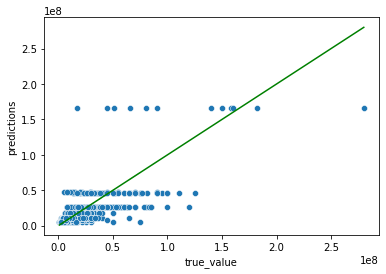

In [16]:
class NodeRegression: # regression node that the same as the regular Node but it contains var_ssr_red
    def __init__(self, featrue=None, question=None, left=None, right=None, var_ssr_red=None, value=None):
        self.featrue = featrue # the decision node feature
        self.question = question # the decesion node feature value to split
        self.left = left # node left child
        self.right = right # node right child
        self.var_ssr_red = var_ssr_red # node variance for split uses
        self.value = value # leaf node only have value
        
    def isLeaf(self):# if the node have a value so its a leaf because decision node does not have value
        if self.value == None:
            return False
        return True
    
    
class DecisionTreeRegressionMine:# my regressor tree class
    def __init__(self, min_samples_split=3, max_depth=2): # same as before
        self.root = None
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def fit(self, X, y): # fitting our model
        self.root = self.BuildTree(X,y)
        
        #Precdtion method to predict using the features of the data set(SECTION B)
        
    def predict(self, X):# predict a sample the same as the classifction tree
        pred = []
        for x in X:
            pred.append(self.sub_pre(x, self.root))
        return pred
    
    def sub_pre(self, x, tree):# trevarse the tree the same as the classifaction tree
        if tree.isLeaf():
            return tree.value
        feature_v = x[tree.featrue] 
        if feature_v <= tree.question:
            return self.sub_pre(x, tree.left)
        
        else:
            return self.sub_pre(x, tree.right)
        
        
    def BuildTree(self, X, y, depth=0):# build the tree the same as the classifaction tree
        number_of_samples = X.shape[0]
        number_of_features = X.shape[1]
        
        if number_of_samples > self.min_samples_split and depth < self.max_depth: # checking if we should create anothr decision node
            best_feature, best_feature_value, left_split, right_split, var_reduce = self.find_best_split(X, y)# findinf the best parametrs
            if var_reduce > 0:
                left = self.BuildTree(X[left_split, :], y[left_split], depth+1)#recursive to the left
                right = self.BuildTree(X[right_split, :], y[right_split], depth+1)# recursive to the right
                return NodeRegression(best_feature, best_feature_value, left, right, var_reduce)
            
        
       

        return NodeRegression(value = self.calc_leaf_val(y))# creating a leaf node
        
        
    
    
    
    def find_best_split(self, X, y):# method to greedy find the best feature
        max_var = float("-inf")
        features_num = X.shape[1]
        best_feature_idx =  None
        best_feature_value =  None
        left =  None
        right =  None
        var_red = 0
        
        #greedy search over all the features
        feat_idxes = [0,1,2,3,4,5,6]
        feat_idx_np = np.array(self.shuffleFeats(feat_idxes))# shuffling the feature indexes
        for feature_idx in feat_idx_np:
            feat_vals = X[:, feature_idx]
            feature_val_split = np.unique(feat_vals)
            if type(feat_vals[0]) == float:
                feat_vals = np.sort(feat_vals)# sorting the values
            for feat_split in feature_val_split:# greedy search over all the feature values
                left_split, right_split=self.split(X, feature_idx, feat_split)
                if len(y[left_split]) > 0  and  len(y[right_split]) > 0:# if the lenght of one(left, right split chuldren) of them is zero so we skip this part
                    curr_var =  self.var_reduce(y, y[left_split], y[right_split]) # searching for the lowest variance reduce
                    #the same as i explained in the classifier treee but , here we use variance reduction to find the best split
                    # the bigger the curr var is the lest is the children variance
                    if curr_var > max_var:
                        max_var = curr_var
                        var_red = curr_var
                        best_feature_idx = feature_idx
                        best_feature_value = feat_split
                        left = left_split
                        right = right_split  
        return (best_feature_idx, best_feature_value, left, right , var_red) # returning the best information we got
                        
                    
    
    def split(self, X, feature_idx, feat_split):# split the node to two sides left and right
        left_split = np.argwhere(X[:, feature_idx] <= feat_split).flatten()# if you are less than the value go left
        right_split = np.argwhere(X[:, feature_idx] > feat_split).flatten()# else go right
        return left_split,right_split 
        
        
    def var_reduce(self, y_pa, y_left, y_right): #from Ilan's lecture 3 calculating the variance refuce of split (father and children)
        w_left, w_right = len(y_left)/len(y_pa) , len(y_right)/len(y_pa)
        v_left, v_right = w_left * np.var(y_left), w_right * np.var(y_right)
        return np.var(y_pa) - (v_left + v_right)
        
        
    
    def calc_leaf_val(self, y):#to calc the leaf value we also calculate the mean value of the node (from Amanda's and ehud's lectures)
        return np.mean(y)
    
    
    def shuffleFeats(self,listOfIdx):#function to shuffle the features indexes
        random.shuffle(listOfIdx)
        l = []
        for item in listOfIdx:
            l.append(item)
        return l


#=======================================PREDECT by using my model (Implementation)=====================================================
X_train_regression = df_train.iloc[:,:7]
X_test_regression = df_test.iloc[:,:7]
y_train_regression = df_train.iloc[:,7]
y_test_regression = df_test.iloc[:,7]

X_train_regression_np = X_train_regression.to_numpy()
X_test_regression_np = X_test_regression.to_numpy()
y_train_regression_np = y_train_regression.to_numpy()
y_test_regression_np = y_test_regression.to_numpy()


regTree = DecisionTreeRegressionMine(max_depth = 3)# create a object of my own regressor tree
start = time.time()
#fitting my own model
regTree.fit(X_train_regression_np, y_train_regression_np)
end = time.time()
#SECTION B PREDCTION:
y_pred_reg_mine = regTree.predict(X_test_regression_np)

# checking preformance
print('My regressor Tree Preformance:')
print('MSE = ', np.sqrt(mean_squared_error(y_test_regression_np, y_pred_reg_mine)))
print('TIMER: ' , end - start)
print()
print('--------------------------------------------')
print()
print('sklearn tree preformance:')

print('MSE:',(np.square(predictions_regresso - y_test_regression)).mean()**0.5)
# show_regresion_error(predictions_regresso, y_test_regression)

st_reg = {'My regressor tree preformence' : ['accuracy of my reg_tree', 'time of my reg_tree'] , '' : [np.sqrt(mean_squared_error(y_test_regression_np, y_pred_reg_mine)), end-start] }
frame = pd.DataFrame(st_reg)
frame

print()
print('------------------------------------------------------')
print()
print('sklearn regressor predections graph')
show_regresion_error(predictions_regresso, y_test_regression)


My regressor tree graph of the predcetions


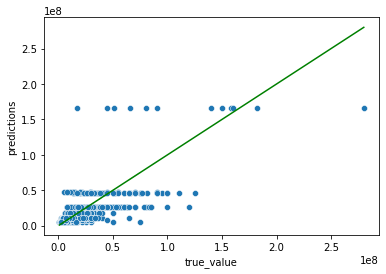

In [17]:
print("My regressor tree graph of the predcetions")
show_regresion_error(y_pred_reg_mine, y_test_regression_np)

כמו שרואים שעץ הרגרסיה שלי נותן תשובה שנעה בין 9000000-7000000
שזה דיי קרוב למה שנותן לנו העץ רגרסיה של הספריה

אבל זמן הריצה בזץ שלי יותר גבוהה מאשר זמן הריצה בעץ של הספריה הסיבה היא שימוש בלולאות ושימוש ברשימות אני חדש בתכנות פייתון
אבל מה שחשוב שהעץ שלי דיי קרוב בביצועיו לעץ של הספריה המוכנה

## Adaboost classifier - the idea is to learn from other mistakes 
$y = sign ( \sum_{i = 0}^{n} {\alpha_{i} \cdot h(X) })$ --- for our predection 



$\epsilon_{stump} = \sum_{\textrm{missing_values}}{\textrm{weights}}$ ---- for calculating my error for every weak classifier



$\alpha = 0.5 \cdot \log(\frac{1-\epsilon_{}}{\epsilon_{}})$ --- stump weight



i will greedly search the best feature and the best feature value for split 

i will calculate Error value 


i will calculate also alpha for each stump


i will calculate predictions and update the weights (Normalizing the Weights)



### הרצאהת אילן:

נקבע ערך הצפוי (predicted value)  עבור כל תצפית ב testing data לפי ה-Classifier הסופי .

כל Classifier Gm מחזיר 1 (true) או 1- (false) .

Classifier הסופי  סוכם מכפלות של תוצאות אם מקדמים של כול ה- Classifier’s 
	      הפשוטים. אם התוצאה שהתקבלה היא חיובית אזי  true=predicted value
                        אחרת false=predicted value


#### *every stump will learn from the previous stump*

In [18]:
class Stump: # my weak classfiers class 
    def __init__(self):
        self.GM = 1 # 1 True , -1 False (classes) By Ilan
        self.feature = None # stump feature 
        self.split_question = None # stump question used for split
        self.alpha = None # alpha used for calculating the error
    
     
        
        
class adaboostMine:
    def __init__(self, n_celf = 3): # clf is a weak classifier
        self.n_celf = n_celf
        self.clfs = []# the adaboost weak classifier list
    
    def fit(self, X, y):
        number_of_samples = X.shape[0]
        number_of_features = X.shape[1]        
        wei = self.initlize_All_Wights(number_of_samples)# initlize all the weights to 1/number of samples
        for _ in range(self.n_celf):
            clf = Stump()# create stump
            m_error = float("inf") 
            #lets search the best feature greedy search for the best its the same like in our previuse models:)
            features_idx = [0,1,2,3,4,5,6]
            features_idx = self.shuffleFeats(features_idx)
            for feature in features_idx:
                feature_values = np.unique(X[:, feature])
                if type(feature_values[0]) == float:
                    feature_values = np.sort(feature_values)
                for feat_val in feature_values:
                    gm = 1 # for predict uses
                    predections = np.ones(number_of_samples)# all predections are 1(True) at the beggining
                    predections[X[:, feature] < feat_val] = -1 # predect samples that the vaue is less than the feature split value into -1 (false)
                    classifiedError = wei[y != predections]# getting the errors by comparing the real values with the predectied values
                    error = sum(classifiedError)# summing the errors
                    if error > 0.5:#if error is bigger thab 0.5 so change the clf gm to -1 
                        gm = -1
                        error = 1-error
                    if error < m_error:
                        # we will take the lowest error that feature index and his question did 
                        clf.split_question = feat_val
                        clf.feature = feature
                        clf.GM = gm
                        m_error = error
            clf.alpha = self.calculate_alpha(error)# calculate the alpha (error)
            predections = self.predict_clf(X, clf, number_of_samples)# predict by the weak classifier
            wei =  self.Normlize_weights(y, clf, predections, wei)# normlizing the weights
            self.clfs.append(clf)# addinf the weak classifier to the weak classifiers list of the adaboost model
            
    
    
    #Precdtion method to predict using the features of the data set(SECTION B) By Ilan's lecture the latest classfier will sum the signs
    def predict(self, X):
        number_of_samples = X.shape[0]
        clf_predections = []
        for clf in self.clfs:
            clf_predections.append(clf.alpha * self.predict_clf(X, clf, number_of_samples))
        n_array = np.sum(clf_predections, axis=0)
        n_array = np.sign(n_array)
        return n_array 
        
                    
                        
                        
                    
    # HELPERS
    
    def shuffleFeats(self,listOfIdx):#function to shuffle the features indexes
        random.shuffle(listOfIdx)
        l = []
        for item in listOfIdx:
            l.append(item)
        return l
    
    def predict_clf(self, X, clf, number_of_samples):# predict method for each weak classifier
        list_of_one = []
        for i in range(number_of_samples):# all the predicts are 1 at the begenning
            list_of_one.append(1)    
        predections = np.array(list_of_one)
        if clf.GM == 1:# check the polarity and predict by it
            predections[X[:, clf.feature] < clf.split_question] = -1
        else:
            predections[X[:, clf.feature] > clf.split_question] = -1 
        return predections
        
    def initlizePredections(self, number_of_samples):# all predections are 1 at the beggining
        list_of_ones = []
        for i in range(number_of_samples):
            list_of_ones.append(1)
        return np.array(list_of_ones)
        
       
    def calculate_alpha(self, error):# calc the alpha error
        alpha = 0.5 * np.log((1.0 - error) / (error))
        return alpha

    def Normlize_weights(self, y, clf, predections, wei):# functions to normalize the weights
        w =  wei  *  np.exp(- clf.alpha * y * predections)
        w = w / np.sum(w)
        return w
        
    
    def initlize_All_Wights(self, number_of_samples):# function to initlize all the weights 
        weiTemp = []
        for i in range(number_of_samples):
            weiTemp.append(1/number_of_samples)
        return np.array(weiTemp)
    
        

        
        

#=======================================PREDECT by using my model (Implementation)=====================================================

adaMine = adaboostMine(n_celf = 3)
X_train_class_np_ada2 = X_train_classification.to_numpy()
y_train_class_np_ada2 = y_train_classification.to_numpy()
x_test_class_np_ada2 = X_test_classification.to_numpy()
y_test_class_np_ada2 = y_test_classification.to_numpy()
y_train_class_np_ada2[y_train_class_np_ada2 == 0] = -1
y_test_class_np_ada2[y_test_class_np_ada2 == 0] = -1
start = time.time()
# fitting my own model
adaMine.fit(X_train_class_np_ada2, y_train_class_np_ada2)
end = time.time()
# SECTION B THE PREDICTION:
pred3 = adaMine.predict(x_test_class_np_ada2)
acc = accuracy_score(y_test_class_np_ada2, pred3)
st = {'My adaboost preformence' : ['accuracy of my adaboost', 'time of my adaboost'] , '' : [acc, end-start] }
frame = pd.DataFrame(st)
frame

print("my adaBoost preformance:")
print("Timer= ", end-start)
print(confusion_matrix(y_test_class_np_ada2, pred3))
print(classification_report(y_test_class_np_ada2, pred3))
print()
print('--------------------------------------')
print()




my adaBoost preformance:
Timer=  4.692299842834473
[[3795   77]
 [ 493  158]]
              precision    recall  f1-score   support

          -1       0.89      0.98      0.93      3872
           1       0.67      0.24      0.36       651

    accuracy                           0.87      4523
   macro avg       0.78      0.61      0.64      4523
weighted avg       0.85      0.87      0.85      4523


--------------------------------------



## if you get an warning and some unexepected values of the preformance of the sklearn adaboost go up to section C run the adaboost classifier again and return here

In [21]:
print("-------------VS--------------")
print("sklearn adaboost preformance")



# if you get an warning and some unexepected go to section C run the adaboost classifier again and return here


print(confusion_matrix(y_test_classification, predictions_ada))
print(classification_report(y_test_classification, predictions_ada))

-------------VS--------------
sklearn adaboost preformance
[[3561  311]
 [ 292  359]]
              precision    recall  f1-score   support

          -1       0.92      0.92      0.92      3872
           1       0.54      0.55      0.54       651

    accuracy                           0.87      4523
   macro avg       0.73      0.74      0.73      4523
weighted avg       0.87      0.87      0.87      4523



# comparing of adaboost:

   ## (my adaboost accurady, sklearn accuracy) = (0.87, 0.87)
   
### ניתן לראות שהדיוק של שני המודלים כמעט שווה שזה מראה שהמחלקה שלי פעלה כרצוי עם פער קטן בחיזוי בינה לבין הספרייה SKLEARN

### למרות זאת יש עליה בזמן הריצה בין האלגוריתם שלנו לשלהם וזה נובע משימוש קצת ברשימות יותר ולולאות
